# EDA Section
---

## Data import

In [5]:
# Import data.csv
import pandas as pd
df = pd.read_csv('../data/processed/cleaned.csv')

# Checking
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Related library import

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

: 

: 

: 

: 

## Seperate Column types

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

: 

: 

: 

: 

## Chi-Square Test of Independence
A nonparametric hypothesis test, to check if two categorical variables are related to each other or not.

In [ ]:
import os
import pandas as pd
from scipy.stats import chi2_contingency

# Folder output
output_folder = '../results/output'
os.makedirs(output_folder, exist_ok=True)  # ถ้า folder ไม่มี จะสร้างให้อัตโนมัติ

# Type of variables
dependent_var = 'class'
independent_vars = [col for col in categorical_cols if col != dependent_var]

# Loop through each independent variable and perform Chi-Squared test
results = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[var] = {'chi2': chi2, 'p-value': p, 'dof': dof}

# ANSI color codes
RED = '\033[91m'
GREEN = '\033[92m'
BOLD = '\033[1m'
RESET = '\033[0m'

significant_vars = []
non_significant_vars = []

# Header
print(f"{BOLD}=================== Chi-Squared Test Results ==================={RESET}")
print('-'*65)
print(f"{BOLD}{'Variable':<20} {'Chi2':<10} {'p-value':<10} {'dof':<5} Result{RESET}")
print('-'*65)

# Prepare DataFrame for saving
output_data = []

# Sort results by Chi2 descending
sorted_results = sorted(results.items(), key=lambda x: x[1]['chi2'], reverse=True)

# Results
for var, res in sorted_results:
    if res['p-value'] < 0.05:
        color = GREEN
        significance = "Significant"
        significant_vars.append(var)
    else:
        color = RED
        significance = "Non-Significant"
        non_significant_vars.append(var)
    
    line = f"{var:<20} {res['chi2']:<10.4f} {res['p-value']:<10.4f} {res['dof']:<5} {significance}"
    print(f"{color}{line}{RESET}")
    
    # Add to DataFrame
    output_data.append({
        'Variable': var,
        'Chi2': res['chi2'],
        'p-value': res['p-value'],
        'dof': res['dof'],
        'Result': significance
    })

# Save to CSV
output_df = pd.DataFrame(output_data)
output_file = os.path.join(output_folder, 'chi_squared_results.csv')
output_df.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")

# Summary
print(f"\n{BOLD}============================ Summary ============================{RESET}")
print(f"{RED}Non-Significant Variables:{RESET} {non_significant_vars}")


NameError: name 'categorical_cols' is not defined

: 

: 

: 

: 

## Cramer's V Test

C:\Users\majis\AppData\Local\Temp\ipykernel_14160\3370538718.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_v_df.index, y='Cramers_V', data=cramers_v_df, palette='viridis')


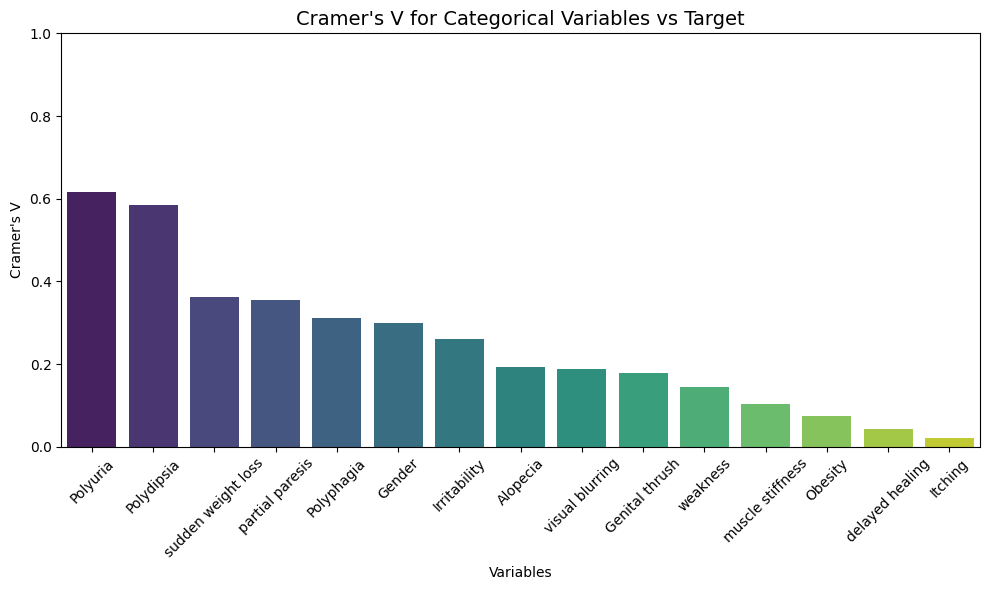

: 

: 

: 

: 

In [ ]:
# Function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Calculate Cramer's V for each categorical variable
cramers_v_values = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    cramers_v_values[var] = cramers_v(contingency_table)

# Convert to DataFrame for plotting
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values('Cramers_V', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=cramers_v_df.index, y='Cramers_V', data=cramers_v_df, palette='viridis')
plt.title("Cramer's V for Categorical Variables vs Target", fontsize=14)
plt.ylabel("Cramer's V")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.tight_layout()

# Figures output
plt.savefig(os.path.join("../results/figures", "cramers_v_barplot.png"), dpi=300)

plt.show()


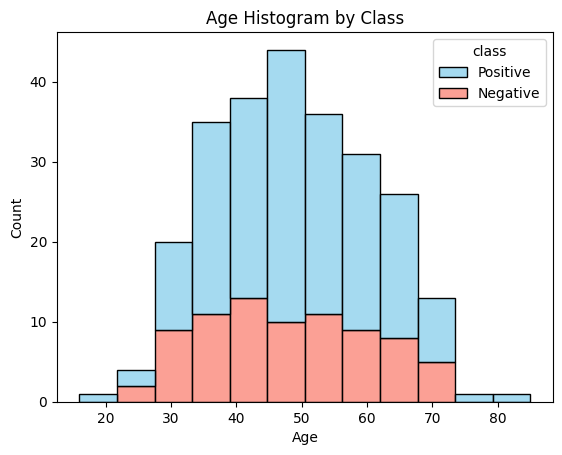

: 

: 

: 

: 

In [ ]:
palette_colors = {'Positive':'skyblue', 'Negative':'salmon'}
sns.histplot(data=df, x='Age', hue='class', multiple='stack', palette= palette_colors)
plt.title('Age Histogram by Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

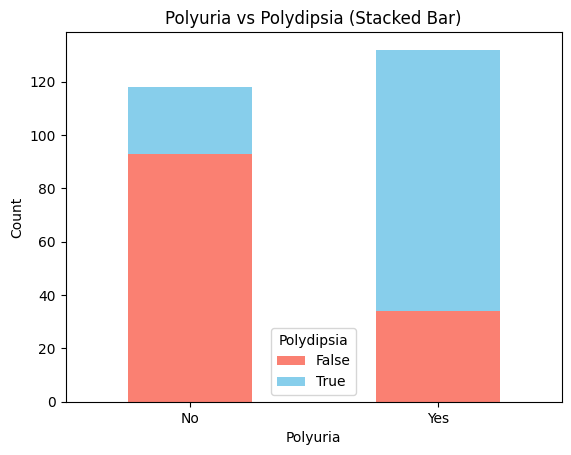

: 

: 

: 

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Stacked Bar Chart ---
stacked_df = pd.crosstab(df['Polyuria'], df['Polydipsia'])
stacked_df.plot(kind='bar', stacked=True, color=['salmon','skyblue'])
plt.title('Polyuria vs Polydipsia (Stacked Bar)')
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Polydipsia', labels=['False', 'True'])
plt.show()

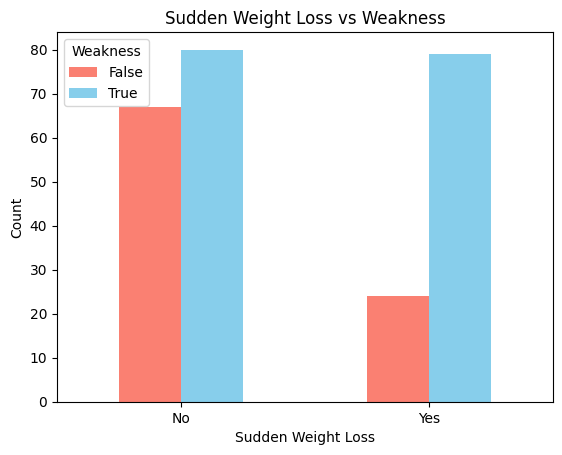

: 

: 

: 

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# กรองเฉพาะ 2 ตัวที่สนใจ
cols = ['sudden weight loss', 'weakness']
df_subset = df[cols]

# สร้างตาราง cross-tab
grouped_df = pd.crosstab(df['sudden weight loss'], df['weakness'])

# Grouped Bar Chart
grouped_df.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Sudden Weight Loss vs Weakness')
plt.xlabel('Sudden Weight Loss')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Weakness', labels=['False', 'True'])
plt.show()


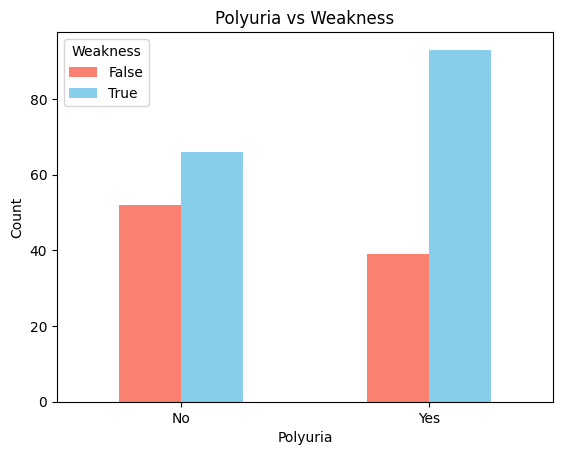

: 

: 

: 

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tab ของสองอาการ
ct = pd.crosstab(df['Polyuria'], df['weakness'])

# Grouped Bar Chart
ct.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Polyuria vs Weakness')
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Weakness', labels=['False','True'])
plt.show()

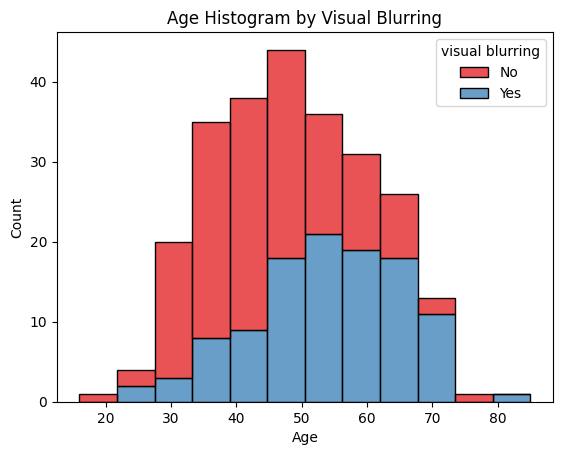

: 

: 

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram แยกตาม Visual Blurring
sns.histplot(data=df, x='Age', hue='visual blurring', multiple='stack', palette='Set1')
plt.title('Age Histogram by Visual Blurring')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


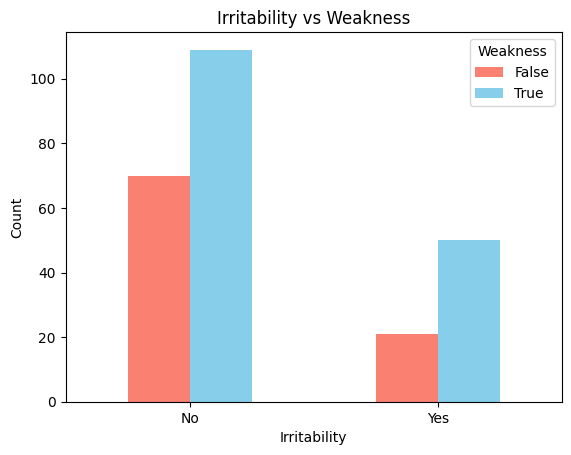

: 

: 

: 

: 

In [ ]:
# Cross-tab
ct = pd.crosstab(df['Irritability'], df['weakness'])

# --- Grouped Bar Chart ---
ct.plot(kind='bar', color=['salmon','skyblue'])
plt.title('Irritability vs Weakness')
plt.xlabel('Irritability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Weakness', labels=['False','True'])
plt.show()